# Linear regression

Fitting $y = mx + c$ to data

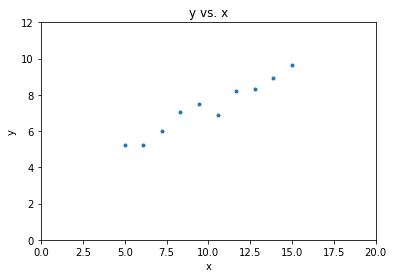

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def data_generate(N=10, mu=0, sigma=.4, xstart=0, xend=1):
    x = np.linspace(xstart,xend,N)
    m, c = .5, 2    
    y = m * x + c + np.random.normal(mu, sigma, N)
    return x,y

def data_plot(x, y):
    plt.figure(1)
    plt.title('y vs. x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0,20,0,12])
    plt.plot(x,y,'.')
    plt.show()
    
np.random.seed(0)
x, y = data_generate(xstart=5, xend=15)
data_plot(x, y)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [5]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
input_dim = 1
output_dim = 1 

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss(reduce=True)
l_rate = 0.1
optimiser = torch.optim.Adam(model.parameters(), lr=l_rate)

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


In [8]:
print_values = False
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    inputs = Variable(torch.FloatTensor(x).unsqueeze_(1))
    labels = Variable(torch.FloatTensor(y).unsqueeze_(1))
        
    optimiser.zero_grad()
    
    outputs = model(inputs)
    
    if epoch % 10 == 0 and print_values == True:
        print('Inputs')
        print(inputs)
        print('Labels')
        print(labels)
        print('Outputs')
        print(outputs)
    
    loss = criterion(outputs, labels)
    loss.backward()
    optimiser.step()
    
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 10, loss 5.000023365020752
epoch 20, loss 1.2156250476837158
epoch 30, loss 0.4087226092815399
epoch 40, loss 0.3243520259857178
epoch 50, loss 0.30018189549446106
epoch 60, loss 0.27237221598625183
epoch 70, loss 0.24656346440315247
epoch 80, loss 0.22415100038051605
epoch 90, loss 0.2044604867696762
epoch 100, loss 0.1870829313993454


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [77]:
slope = model.linear.weight.data.numpy()[0][0]
bias = model.linear.bias.data.numpy()[0]

print(slope)
print(bias)

0.58692884
1.2550099


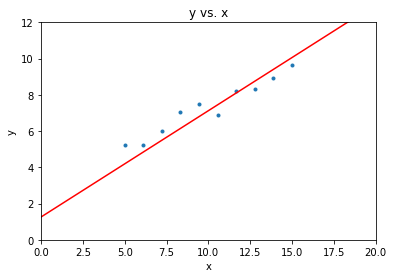

In [96]:
def make_line(model=model, xstart=0, xend=1):
    x = np.linspace(xstart, xend, 10)
    x = torch.Tensor(x).unsqueeze_(1)
    #print(x)
    model.eval()
    y = model(Variable(x))
    return x.squeeze_().numpy(), y.squeeze_().data.numpy()

x_line, y_line = make_line(model, 0, 20)

#print(x_line) # Torch tensor
#print(y_line) # Variable (torch tensor)

#print (x_line.squeeze_().numpy())
#print (y_line.squeeze_().data.numpy())


def make_line(slope, bias, xstart=0, xend=1):
    x = np.linspace(xstart,xend,10)
    m, c = slope, bias    
    y = m * x + c
    return x, y

def data_plot_w_line(x, y, x_line, y_line):
    plt.figure(1)
    plt.title('y vs. x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0,20,0,12])
    plt.plot(x,y,'.')
    plt.plot(x_line, y_line, 'r-')
    plt.show()
    
#x_line, y_line = make_line(xstart=0, xend=20, slope=slope, bias=bias)
data_plot_w_line(x, y, x_line, y_line)
